FAKE JOB PREDICITION

In [1]:
!wget "https://assets.telegraphindia.com/telegraph/2022/Sep/1664219702_job-scams.jpg" -O demo.jpg

--2022-10-03 03:27:17--  https://assets.telegraphindia.com/telegraph/2022/Sep/1664219702_job-scams.jpg
Resolving assets.telegraphindia.com (assets.telegraphindia.com)... 23.197.16.100, 2600:1408:c400:1085::5cb, 2600:1408:c400:1092::5cb
Connecting to assets.telegraphindia.com (assets.telegraphindia.com)|23.197.16.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38616 (38K) [image/jpeg]
Saving to: ‘demo.jpg’

demo.jpg            100%[===================>]  37.71K  --.-KB/s    in 0.03s   

2022-10-03 03:27:17 (1.30 MB/s) - ‘demo.jpg’ saved [38616/38616]



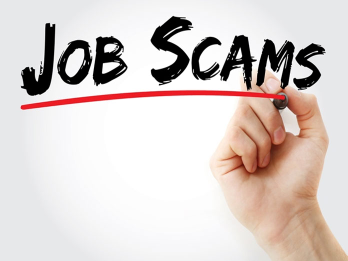

True

In [2]:
 import cv2
 from google.colab.patches import cv2_imshow

img=cv2.imread('/content/demo.jpg',255)
cv2_imshow(img)
cv2.imwrite('demo1.jpg',img) # saving the image

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/Anshupriya2694/Fake-Job-Posting-Prediction/13e0e74b288b55605e2aa55392a82e86d28de053/data/fake_job_postings_cleaned.csv')
df

,Unnamed: 0,telecommuting,fraudulent,ratio,text,character_count
0,0,0,0,0.03,"Marketing Intern US, NY, New York We're Food52...",2705
1,1,0,0,0.03,"Visual Designer US, NY, New York Kettle is an ...",1991
2,2,0,0,0.03,"Payroll Tax Specialist US, NY, New York Namely...",1564
3,3,0,0,0.03,"Marketing Manager US, NY, New York Super Socce...",2871
4,4,0,0,0.03,"English Teacher Abroad US, NY, New York We hel...",669
...,...,...,...,...,...,...
10588,10588,1,1,0.00,"Military Benefits Counselor US, , chicago Anth...",1173
10589,10589,0,0,0.00,Sr.Business Intelligence Technical Architect U...,1270
10590,10590,0,0,0.00,Licensed Practical Nurse (LPN)- Private Duty U...,2124
10591,10591,0,0,0.00,"SAS Grid Developer US, NJ, Berkeley Heights ...",1540


In [6]:
df.shape #number of rows and columns in dataframe

(10593, 6)

In [7]:
df.size #size of the dataframe

63558

In [8]:
df.info() #information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10593 non-null  int64  
 1   telecommuting    10593 non-null  int64  
 2   fraudulent       10593 non-null  int64  
 3   ratio            10593 non-null  float64
 4   text             10593 non-null  object 
 5   character_count  10593 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 496.7+ KB


In [9]:
df.isnull().sum() #checking the null values in each column

Unnamed: 0         0
telecommuting      0
fraudulent         0
ratio              0
text               0
character_count    0
dtype: int64

In [10]:
X = df[['telecommuting', 'ratio',  'character_count']] #x is input in 2 dimensional array
y = df['fraudulent'] #y is input in 1 dimensional array

In [11]:
X.ndim #number of dimensions

2

In [12]:
y.ndim #number of dimensions

1

In [13]:
np.unique(df['fraudulent'],return_counts=True) #returns unique of array  0,REAL 1,FAKE

(array([0, 1]), array([9868,  725]))

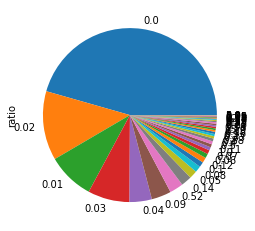

In [14]:
df['ratio'].value_counts().plot(kind='pie')

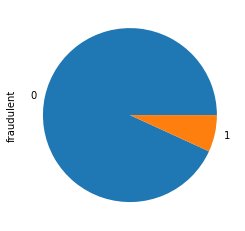

In [15]:
df['fraudulent'].value_counts().plot(kind='pie')#kind=bar,barh

AttributeError: ignored

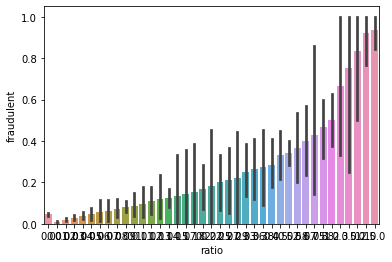

In [39]:
sns.barplot(x='ratio',y='fraudulent',data=df) #plotting the ratio of number of fake(1) and real(0) jobs

MULTILINEAR REGRESSION

In [17]:
#split the data to predict the fraudulent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(7944, 3)
(2649, 3)
(7944,)


(2649,)

In [19]:
# Import Linear Regression algorithm 
from sklearn.linear_model import LinearRegression

In [20]:
# calling the algorithm 
model = LinearRegression()

In [21]:
#training the machine 
model.fit(X_train,y_train)

LinearRegression()

In [22]:
#pred the output
y_pred = model.predict(X_test)
y_pred 

array([0.08852636, 0.07283026, 0.0491062 , ..., 0.0828509 , 0.06881005,
       0.02887403])

In [23]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
4647,0,0.088526
5121,0,0.072830
5025,0,0.049106
10189,0,-0.002207
6967,0,0.092519
...,...,...
2551,0,0.070550
7878,0,0.206134
6639,0,0.082851
9357,0,0.068810


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


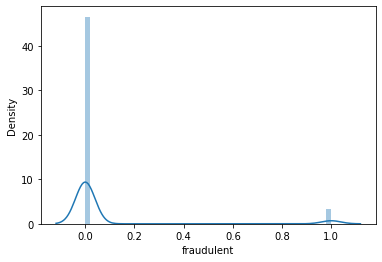

In [25]:
sns.distplot(df['fraudulent']) #exploratory data analysis (EDA)-to analyze and investigate data sets and summarize the characteristics

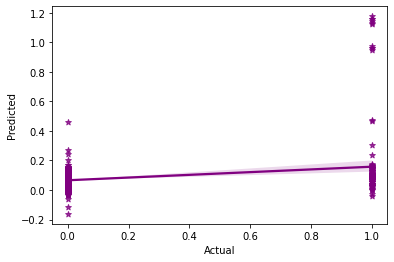

In [26]:
# Data visualization 
sns.regplot(x='Actual',y='Predicted',data=df1,color='purple',marker='*')

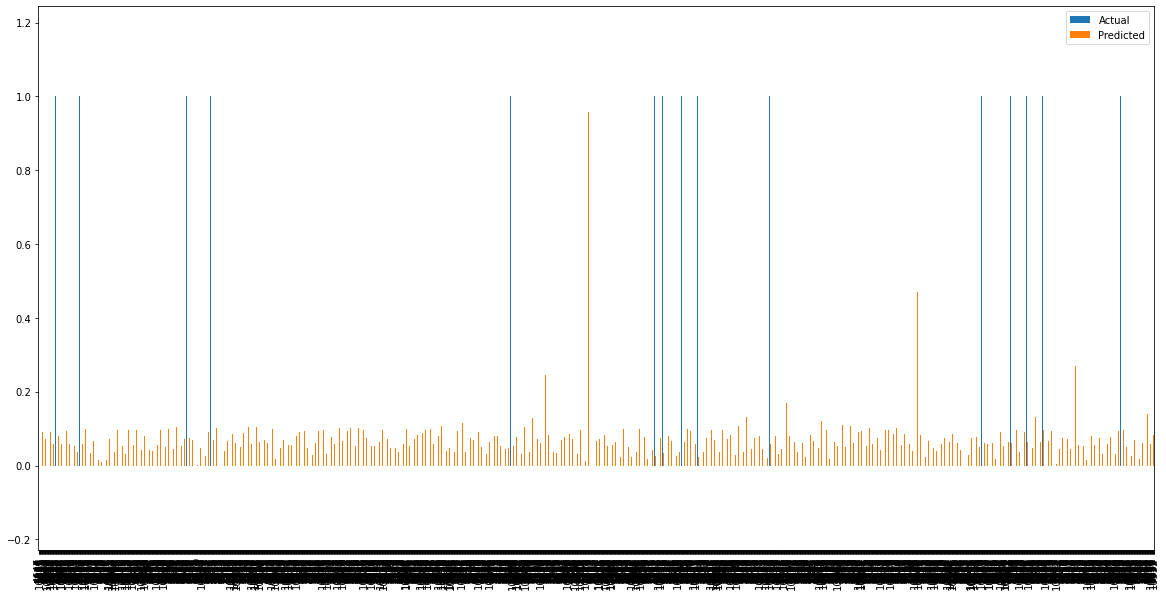

In [27]:
df1.plot(figsize=(20,10),kind='bar')


CLASSIFICATION

K CLASSIFIER

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=102)

In [29]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=102)

In [30]:
y_pred = model.predict(X)
y_pred 

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10588    1
10589    0
10590    0
10591    0
10592    0
Name: fraudulent, Length: 10593, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score #accuracy score
accuracy_score(y,y_pred)

0.9315585764183895

CONFUSION MATRIX

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[9868,    0],
       [ 725,    0]])

In [34]:
accuracy=(9868+0)/(9868+0+725+0)
accuracy

0.9315585764183895

In [35]:
precision = (9868)/(9868+0)
precision

1.0

In [36]:
recall = (9686)/(9686+725)
recall

0.9303621169916435

In [38]:
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.9639249639249639

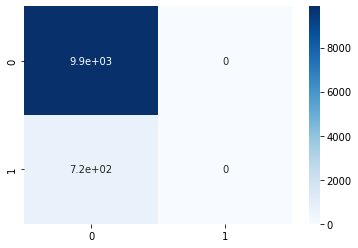

In [37]:
import seaborn as sns 
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
sns.heatmap(confusion_matrix(y,y_pred),annot=True,cmap='Blues')